# Student Performance Data Visualization.

In this project we will look at the Data Visualization through the given Dataset.

You can find the dataset from https://www.kaggle.com/spscientist/students-performance-in-exams this link.

Once you have downloaded the dataset save it to the same location of your python file.

Okay, Then import the necessary libraries for the project.

In [111]:
# Import Libraries that'll be needed for the analysis and visualization.
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
# Above line of code is for viewing the graphs in ipython notebook itself.

In [67]:
# Seting up Students_performance from the csv file.
students_performance = pd.read_csv("StudentsPerformance.csv")

In [68]:
# Just a little preview on what we have and what we don't.
students_performance.head()

gender race/ethnicity parental level of education         lunch  \
0  female        group B           bachelor's degree      standard   
1  female        group C                some college      standard   
2  female        group B             master's degree      standard   
3    male        group A          associate's degree  free/reduced   
4    male        group C                some college      standard   

  test preparation course  math score  reading score  writing score  
0                    none          72             72             74  
1               completed          69             90             88  
2                    none          90             95             93  
3                    none          47             57             44  
4                    none          76             78             75

In [69]:
# Info of all the columns.
students_performance.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race/ethnicity               1000 non-null   object
 2   parental level of education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test preparation course      1000 non-null   object
 5   math score                   1000 non-null   int64 
 6   reading score                1000 non-null   int64 
 7   writing score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


In [70]:
# To find if there are any null values present in the dataset.
students_performance.isnull().sum()

gender                         0
race/ethnicity                 0
parental level of education    0
lunch                          0
test preparation course        0
math score                     0
reading score                  0
writing score                  0
dtype: int64

In [71]:
# To help describe the integer columns and also to know some basic things about those columns.
students_performance.describe()

math score  reading score  writing score
count  1000.00000    1000.000000    1000.000000
mean     66.08900      69.169000      68.054000
std      15.16308      14.600192      15.195657
min       0.00000      17.000000      10.000000
25%      57.00000      59.000000      57.750000
50%      66.00000      70.000000      69.000000
75%      77.00000      79.000000      79.000000
max     100.00000     100.000000     100.000000

In [72]:
# To figure out all the unique values of all the columns.
students_performance.nunique()

gender                          2
race/ethnicity                  5
parental level of education     6
lunch                           2
test preparation course         2
math score                     81
reading score                  72
writing score                  77
dtype: int64

From the given data we are going to analysis it and find of what are the thing that could be useful.
Also, if the dataset even makes any sense and to do this we will create various different 
graphs to answers some questions to make the data understandable.

Like, in the graph below we found out that there were more number of female than thheir counterpart who gave the exams. And the difference between would be as low as 100 odd students as we can clearly see.

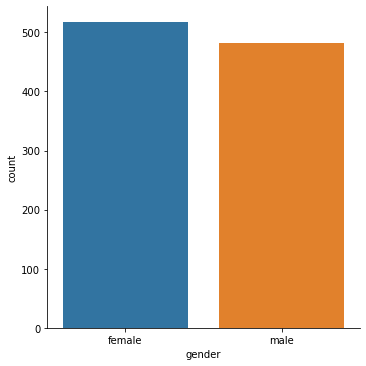

In [73]:
# Bargraph for the gender count.
sns.catplot(x = 'gender',kind = "count",data=students_performance)

Now, again form this is similar to the previous one but it answers few more question on our data. That is, the race/ethnicity has 5 unique values and there are more number of Female than male in 'group B' and in 'group C' the females dominate the males while in the other three groups which are group A, group D, group E the count of male is slightly higher than the female. 

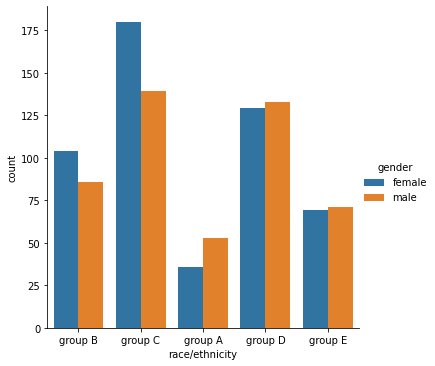

In [74]:
# Another one of the Bar graph.
sns.catplot(x = 'race/ethnicity', kind = "count", hue = "gender",data=students_performance)

<AxesSubplot:xlabel='math score', ylabel='gender'>

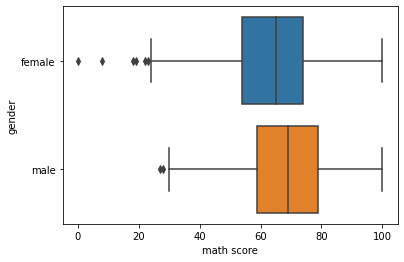

In [75]:
# This is a Box plot on both male and female's Math score.
sns.boxplot(x = 'math score' , y = "gender", data = students_performance)

<AxesSubplot:>

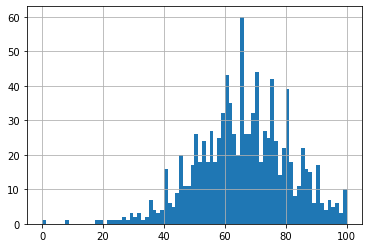

In [76]:
# Histogram of all the scores of Math.
students_performance['math score'].hist(bins = 80)

The Above datagraph a boxplot graph on the math score of all students and from that graph we got to know that the range of the scores of both female and male Math Score and we can see all 4 quartile range through the box plot. After which is the histogram with which we not know the approx mean of all the students.

The below line of code are the exact mean of all the students in Math and also the mean of both male and female induvidually.

In [77]:
# Mean of Math score of all the scores.
students_performance['math score'].mean()

66.089

In [78]:
# Mean of the Math score of only female.
students_performance['math score'].loc[students_performance['gender'] == 'female'].mean()

63.633204633204635

In [79]:
# Mean of the Math score of only male.
students_performance['math score'].loc[students_performance['gender'] == 'male'].mean()

68.72821576763485

The same process done which Math scores have been repeated for 'reading score' and 'writing score' as well and doing this we found out more about the data.

<AxesSubplot:xlabel='reading score', ylabel='gender'>

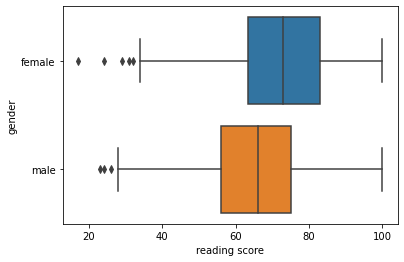

In [80]:
sns.boxplot(x = 'reading score' , y = "gender", data = students_performance)

<AxesSubplot:>

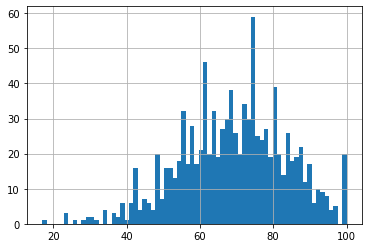

In [81]:
students_performance['reading score'].hist(bins = 70)

In [82]:
students_performance['reading score'].mean()

69.169

In [83]:
students_performance['reading score'].loc[students_performance['gender'] == 'female'].mean()

72.60810810810811

In [84]:
students_performance['reading score'].loc[students_performance['gender'] == 'male'].mean()

65.47302904564316

<AxesSubplot:xlabel='writing score', ylabel='gender'>

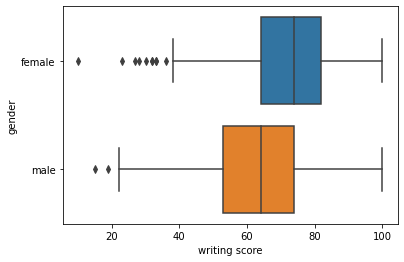

In [85]:
sns.boxplot(x = 'writing score' , y = "gender", data = students_performance)

<AxesSubplot:>

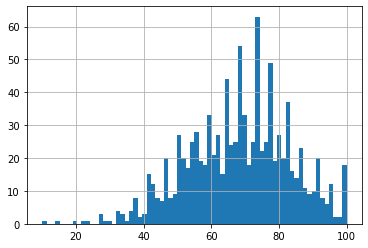

In [86]:
students_performance['writing score'].hist(bins = 70)

In [87]:
students_performance['writing score'].mean()

68.054

In [88]:
students_performance['writing score'].loc[students_performance['gender'] == 'female'].mean()

72.46718146718146

In [89]:
students_performance['writing score'].loc[students_performance['gender'] == 'male'].mean()

63.31120331950208

Next what i did was I added a new column to the dataframe named 'percentage' and i calculated it by adding 'math score', 'reading score' and 'writing score' and dividing it by 300 and multpilying the answer with 100.

After calculating the percentage of all the students I calculated the average percentage of them using the histogram again.

In [90]:
# Created a new column 'percentage' using the 3 scores column.
students_performance['percentage'] = ((students_performance['math score'] + students_performance['writing score'] + 
                                       students_performance['reading score'] ) * 100) / 300

<AxesSubplot:>

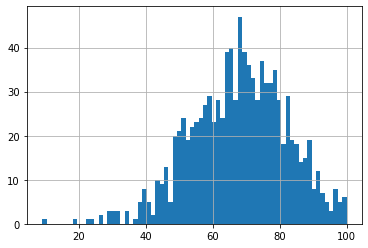

In [97]:
students_performance['percentage'].hist(bins = 70)

In [104]:
students_performance.head()

gender race/ethnicity parental level of education         lunch  \
0  female        group B           bachelor's degree      standard   
1  female        group C                some college      standard   
2  female        group B             master's degree      standard   
3    male        group A          associate's degree  free/reduced   
4    male        group C                some college      standard   

  test preparation course  math score  reading score  writing score  \
0                    none          72             72             74   
1               completed          69             90             88   
2                    none          90             95             93   
3                    none          47             57             44   
4                    none          76             78             75   

   percentage grades results  pass/fail  
0   72.666667      C    pass          1  
1   82.333333      B    pass          1  
2   92.666667      A    pass          1  
3   49.333333      D    pass          1  
4   76.333333     C+    pass          1

From the newely created column 'percentage' I designed a function which would return the grade based on the percentage and added a new column 'grades' to store them in the dataframe.

And them another column which would let us know whether the student passes or failed based on the grades that he/she received.

In [95]:
def grades(performance):
    '''
    This function takes on the particular column as the parameter
    and whould return the grade according to the percentage of
    the student's scores.
    '''
    percentage = performance
    
    if percentage >= 92:
        return 'A'
    elif percentage >= 89 and percentage < 92:
        return 'A-'
    elif percentage >= 86 and percentage < 89:
        return 'B+'
    elif percentage >= 82 and percentage < 86:
        return 'B'
    elif percentage >= 79 and percentage < 82:
        return 'B-'
    elif percentage >= 76 and percentage < 79:
        return 'C+'
    elif percentage >= 72 and percentage < 76:
        return 'C'
    elif percentage >= 35 and percentage < 72:
        return 'D'
    else:
        return 'F'

# Called the function grade here.
students_performance['grades'] = students_performance[['percentage']].apply(grades,axis=1)

In [96]:
def results(performance):
    '''
    This is the function that gives us the result that is if 
    the grade is F than it would return 0 and if not it would return 1.
    '''
    grades = performance
    
    if grades != 'F':
        return 1
    else:
        return 0
    
# Called the function grade here.
students_performance['results'] = students_performance[['grades']].apply(results,axis=1)

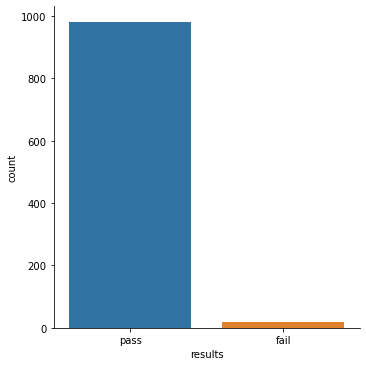

In [98]:
# Converted the 0 and 1 in results to pass and fail.
students_performance["results"] = students_performance.results.map({0: "fail", 1: "pass"})

sns.catplot(x = 'results', kind = "count", data = students_performance)

From the results column we got to know that almost all the students passes except a very few as it's evident from the graph shown above.

Then through the second graph we could say that there are more number of female who failed than male out of all those who appeared for the examination.

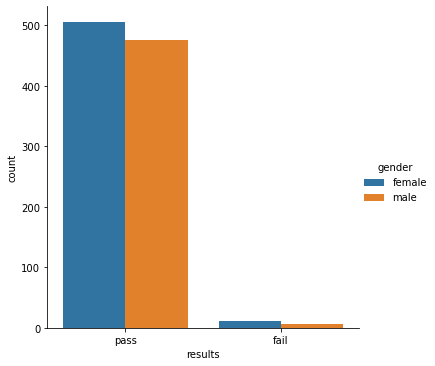

In [110]:
sns.catplot(x = 'results', kind = "count", hue='gender', data = students_performance)

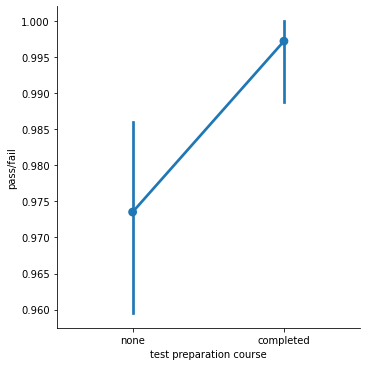

In [106]:
# Added a new column from the results with 0's and 1's
students_performance["pass/fail"] = students_performance.results.map({"fail" : 0,"pass": 1})

# The point graph whihc has pass/fail and test preparation course.
sns.catplot(x = 'test preparation course',y = 'pass/fail', kind= "point" ,data=students_performance)

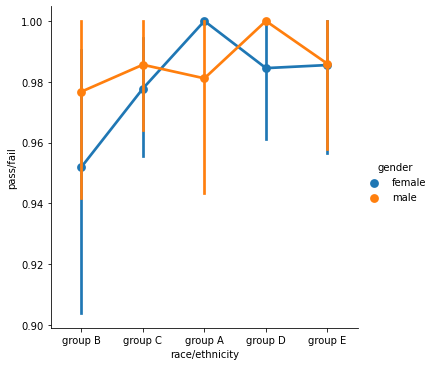

In [107]:
# The point graph whihc has pass/fail and race/ethnicity course.
sns.catplot(x = 'race/ethnicity',y = 'pass/fail', kind= "point", hue = 'gender' ,data=students_performance)

This is a point graph from which we get to know that almost all male and female passed who were from group E. While, the students from Group B where the ones who failed the most and we can figure it out through the above graph as the verical line is the longest in group B than in any other groups.

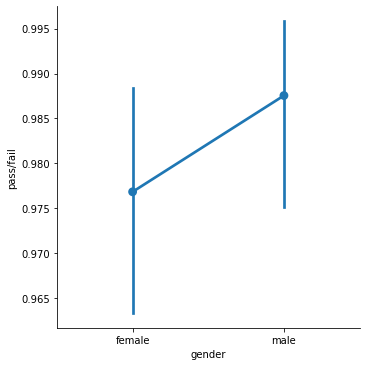

In [108]:
# Another point graph.
sns.catplot(x = 'gender',y = 'pass/fail', kind= "point" ,data=students_performance)

From the above graph we can conculde that there were more number of female who failed in the exams than the men and it's quite suggestive from the graph itself.